<a href="https://colab.research.google.com/github/sahithicheruku/JobSync/blob/main/Sahithisricheruku_(3)_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adversarial Search: Playing Connect 4

Student Name: Sahithisri cheruku

I have used the following AI tools: No

I understand that my submission needs to be my own work: cheruku

## Instructions

Total Points: Undegraduates 100, graduate students 110

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

You will implement different versions of agents that play Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

Note that [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution  )
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem [10 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model (result function)
* Goal state (terminal state and utility)

Describe each component and then implement it as a function that can be used by search algorithms.

In [ ]:
import numpy as np
from typing import List, Tuple, Optional

def initial_state(shape: Tuple[int, int] = (6, 7)) -> np.ndarray:
    """Create initial empty board of given shape."""
    return np.zeros(shape, dtype=int)

def actions(state: np.ndarray) -> List[int]:
    """Return list of valid columns where a piece can be dropped."""
    return [col for col in range(state.shape[1]) if state[0][col] == 0]

def result(state: np.ndarray, player: int, action: int) -> np.ndarray:
    """Return new board state after dropping piece in specified column."""
    new_state = state.copy()
    for row in range(state.shape[0]-1, -1, -1):
        if new_state[row][action] == 0:
            new_state[row][action] = player
            return new_state
    raise ValueError("Invalid move: column is full")

def check_win(state: np.ndarray, player: int) -> bool:
    """Check if given player has won."""
    # Horizontal checks
    for row in range(state.shape[0]):
        for col in range(state.shape[1]-3):
            if all(state[row][col+i] == player for i in range(4)):
                return True

    # Vertical checks
    for row in range(state.shape[0]-3):
        for col in range(state.shape[1]):
            if all(state[row+i][col] == player for i in range(4)):
                return True

    # Diagonal checks (positive slope)
    for row in range(state.shape[0]-3):
        for col in range(state.shape[1]-3):
            if all(state[row+i][col+i] == player for i in range(4)):
                return True

    # Diagonal checks (negative slope)
    for row in range(3, state.shape[0]):
        for col in range(state.shape[1]-3):
            if all(state[row-i][col+i] == player for i in range(4)):
                return True

    return False

def terminal(state: np.ndarray) -> bool:
    """Check if game is over (win or draw)."""
    return check_win(state, 1) or check_win(state, -1) or len(actions(state)) == 0

def utility(state: np.ndarray, player: int) -> int:
    """Return utility value of terminal state for given player."""
    if check_win(state, player):
        return 1
    elif check_win(state, -player):
        return -1
    return 0

# Test cases
def test_connect4():
    # Test 1: Initial state
    board = initial_state((3, 4))  # Smaller board for testing
    print("Initial board:")
    print(board)
    assert board.shape == (3, 4)
    assert np.all(board == 0)

    # Test 2: Available actions
    moves = actions(board)
    print("\nAvailable moves:", moves)
    assert moves == [0, 1, 2, 3]

    # Test 3: Making moves
    board = result(board, 1, 1)  # Player 1 drops in column 1
    board = result(board, -1, 1)  # Player -1 drops in column 1
    print("\nAfter two moves in column 1:")
    print(board)
    assert board[2][1] == 1
    assert board[1][1] == -1

    # Test 4: Horizontal win detection
    winning_board = np.array([
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [1, 1, 1, 1]
    ])
    print("\nHorizontal win board:")
    print(winning_board)
    assert check_win(winning_board, 1) == True
    assert terminal(winning_board) == True
    assert utility(winning_board, 1) == 1
    assert utility(winning_board, -1) == -1

if __name__ == "__main__":
    test_connect4()

Initial board:
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]

Available moves: [0, 1, 2, 3]

After two moves in column 1:
[[ 0  0  0  0]
 [ 0 -1  0  0]
 [ 0  1  0  0]]

Horizontal win board:
[[0 0 0 0]
 [0 0 0 0]
 [1 1 1 1]]


How big is the state space? Give an estimate and explain it.

For a standard 6x7 board: Each cell can be empty(0), player 1(+1), or player 2(-1), giving 3^42 theoretical positions. However, legal positions are much fewer due to:

Gravity rule (pieces must fall down)
Alternating turns
Game ends at first 4-in-a-row

More accurate estimate: ~4.5 trillion (4.5 × 10^12) legal positions.

How big is the game tree that minimax search will go through? Give an estimate and explain it.

Branching factor: 7 (possible columns)
Maximum depth: 42 (total cells)
Theoretical size: 7^42
Pruning reduces this but still massive
First few levels:

Level 1: 7 nodes
Level 2: 7 × 7 = 49 nodes
Level 3: 7 × 7 × 7 = 343 nodes
Each level multiplies by ~7



Even with alpha-beta pruning, full-depth search is computationally infeasible on standard board.

## Task 2: Game Environment and Random Agent [25 point]

Use a numpy character array as the board.

In [ ]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


The standard board is $6 \times 7$ but you can use smaller boards to test your code. Instead of colors (red and yellow), I use 1 and -1 to represent the players. Make sure that your agent functions all have the from: `agent_type(board, player = 1)`, where board is the current board position (in the format above) and player is the player whose next move it is and who the agent should play (as 1 and -1).

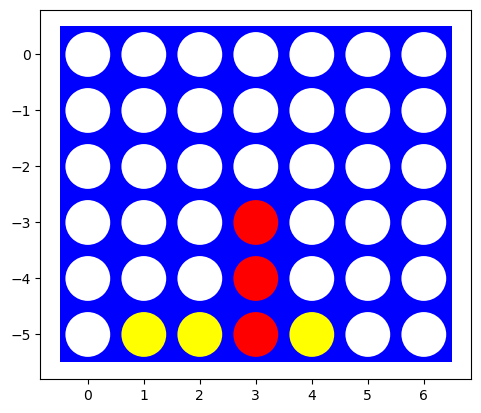

In [ ]:
# Visualization code by Randolph Rankin

import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]
visualize(board)

Implement helper functions for:

* A check for available actions in each state `actions(state)`.
* The transition model `result(state, player, action)`.
* Check for terminal states `terminal(state)`.
* The utility function `utility(s, player)`.

Some functions have the player in there so your agent will be able to play red or yellow.
Make sure that all these functions work with boards of different sizes (number of columns and rows).

Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = 1): ...`

The argument `player` is used for agents that do not store what color they are playing. The value passed on by the environment should be 1 ot -1 for player red and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

Player 1 moves: 3


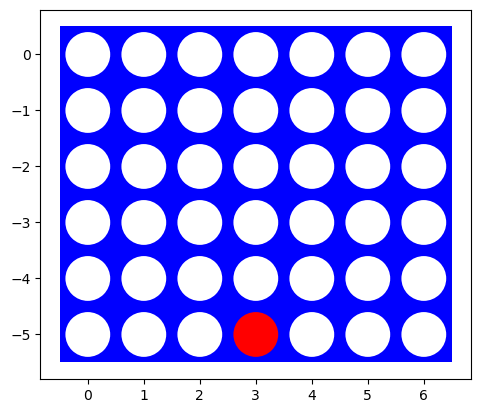

Player -1 moves: 5


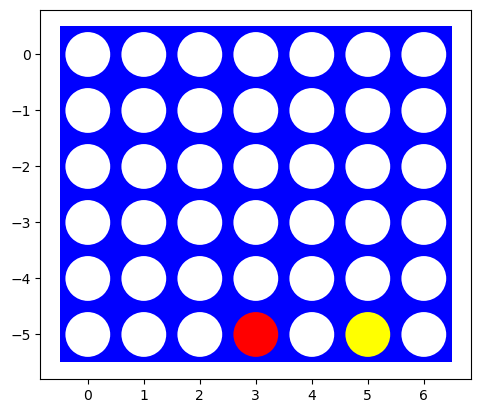

Player 1 moves: 2


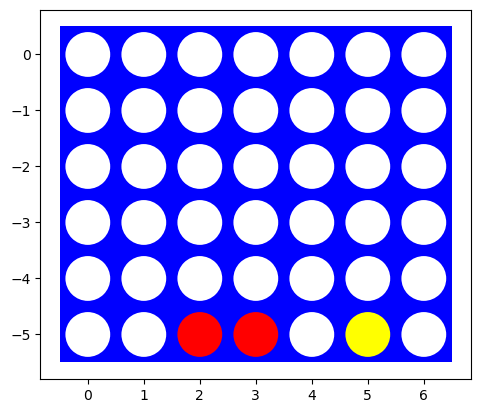

Player -1 moves: 3


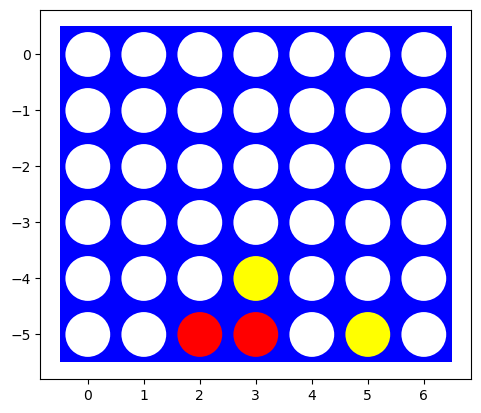

Player 1 moves: 2


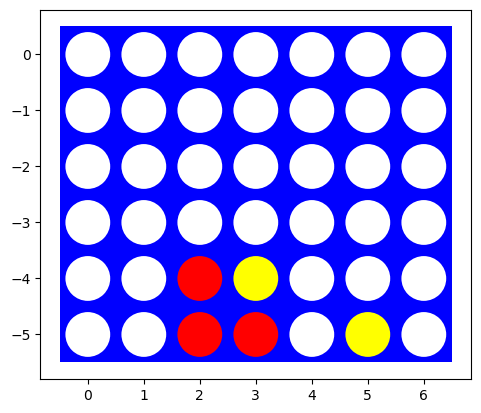

Player -1 moves: 1


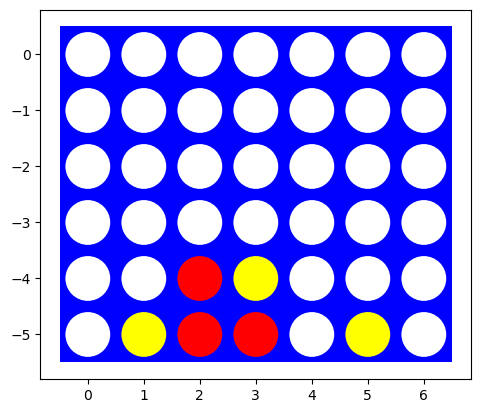

Player 1 moves: 5


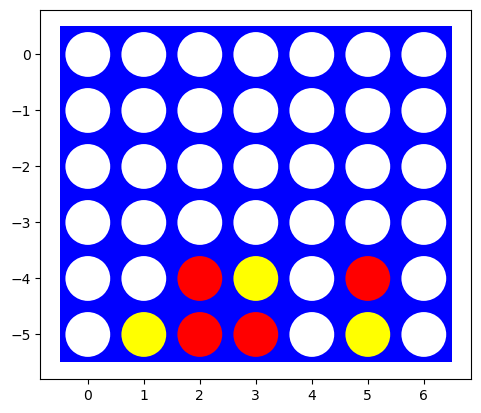

Player -1 moves: 4


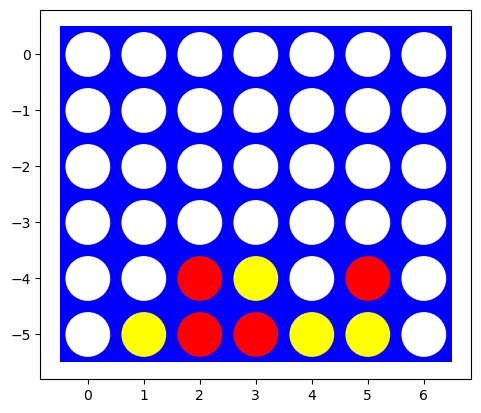

Player 1 moves: 1


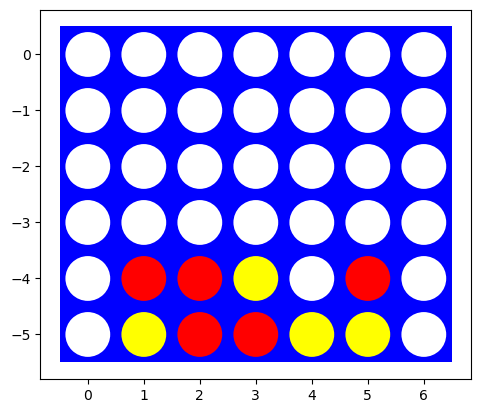

Player -1 moves: 6


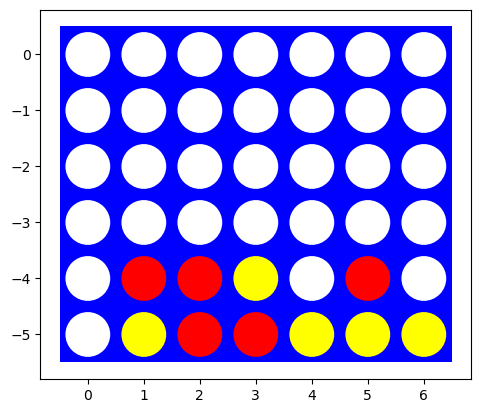

Player 1 moves: 4


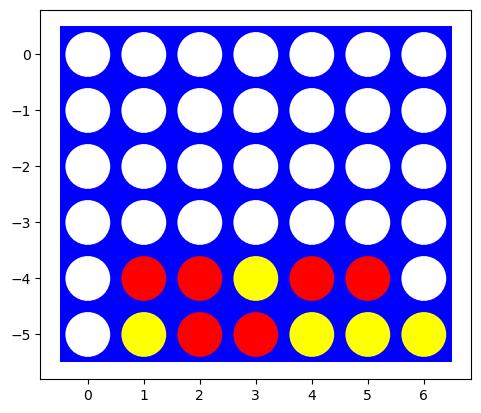

Player -1 moves: 2


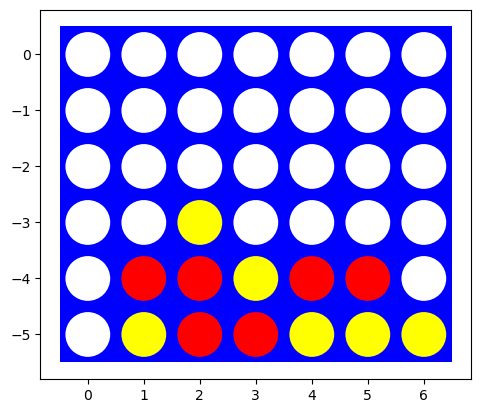

Player 1 moves: 0


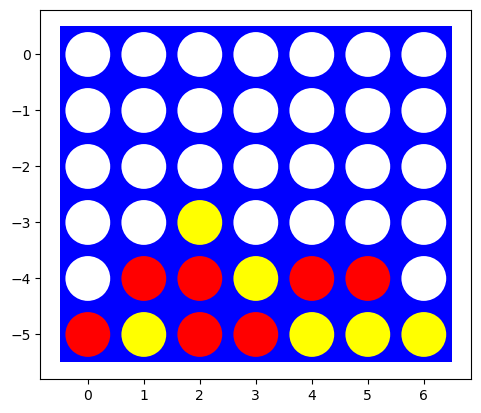

Player -1 moves: 6


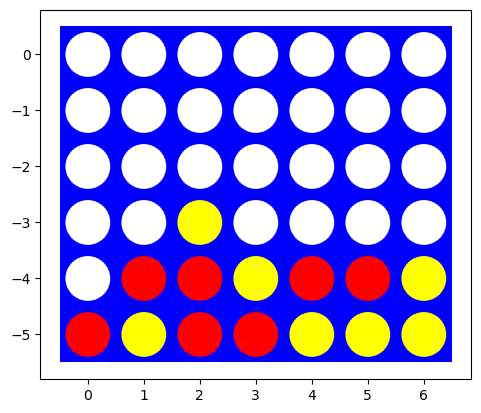

Player 1 moves: 1


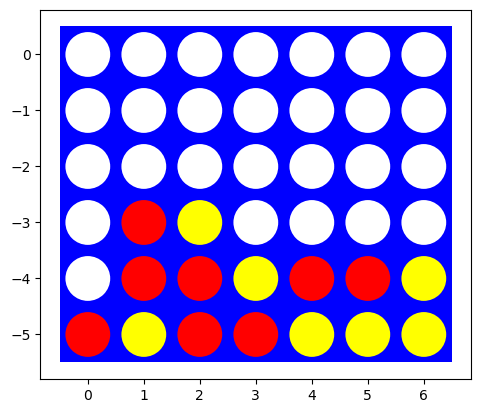

Player -1 moves: 0


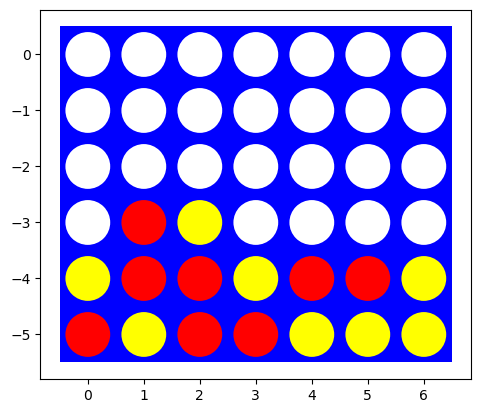

Player 1 moves: 6


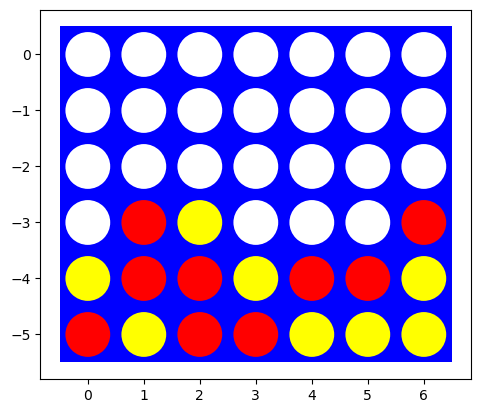

Player -1 moves: 1


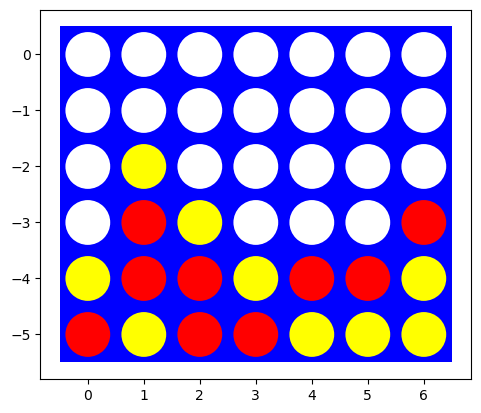

Player -1 wins!

Results after 1000 games:
Player 1 wins: 541 (54.1%)
Player 2 wins: 455 (45.5%)
Draws: 4 (0.4%)


In [ ]:
import numpy as np
from typing import Callable, Tuple, Optional
import random
import matplotlib.pyplot as plt

class Connect4Environment:
    def __init__(self, shape: Tuple[int, int] = (6, 7)):
        self.shape = shape
        self.board = np.zeros(shape, dtype=int)

    def visualize(self):
        plt.axes()
        rectangle = plt.Rectangle((-0.5, self.shape[0]*-1+0.5), self.shape[1], self.shape[0], fc='blue')
        circles = []
        for i, row in enumerate(self.board):
            for j, val in enumerate(row):
                color = 'white' if val == 0 else 'red' if val == 1 else 'yellow'
                circles.append(plt.Circle((j, i*-1), 0.4, fc=color))
        plt.gca().add_patch(rectangle)
        for circle in circles:
            plt.gca().add_patch(circle)
        plt.axis('scaled')
        plt.show()

    def reset(self) -> np.ndarray:
        self.board = np.zeros(self.shape, dtype=int)
        return self.board

    def get_valid_moves(self) -> list:
        return [col for col in range(self.shape[1]) if self.board[0][col] == 0]

    def make_move(self, column: int, player: int) -> bool:
        if column not in self.get_valid_moves():
            return False

        for row in range(self.shape[0]-1, -1, -1):
            if self.board[row][column] == 0:
                self.board[row][column] = player
                return True
        return False

    def check_win(self, player: int) -> bool:
        # Horizontal
        for row in range(self.shape[0]):
            for col in range(self.shape[1]-3):
                if all(self.board[row][col+i] == player for i in range(4)):
                    return True

        # Vertical
        for row in range(self.shape[0]-3):
            for col in range(self.shape[1]):
                if all(self.board[row+i][col] == player for i in range(4)):
                    return True

        # Diagonal (positive slope)
        for row in range(self.shape[0]-3):
            for col in range(self.shape[1]-3):
                if all(self.board[row+i][col+i] == player for i in range(4)):
                    return True

        # Diagonal (negative slope)
        for row in range(3, self.shape[0]):
            for col in range(self.shape[1]-3):
                if all(self.board[row-i][col+i] == player for i in range(4)):
                    return True

        return False

    def is_draw(self) -> bool:
        return len(self.get_valid_moves()) == 0

    def is_game_over(self) -> bool:
        return self.check_win(1) or self.check_win(-1) or self.is_draw()

    def get_winner(self) -> Optional[int]:
        if self.check_win(1):
            return 1
        if self.check_win(-1):
            return -1
        return None

    def play_game(self, player1: Callable, player2: Callable, verbose: bool = False) -> int:
        self.reset()
        current_player = 1

        while not self.is_game_over():
            if current_player == 1:
                move = player1(self.board.copy(), 1)
            else:
                move = player2(self.board.copy(), -1)

            if not self.make_move(move, current_player):
                return -current_player

            if verbose:
                print(f"Player {current_player} moves: {move}")
                self.visualize()

            current_player = -current_player

        winner = self.get_winner()
        if verbose:
            if winner:
                print(f"Player {winner} wins!")
            else:
                print("Draw!")
        return winner if winner else 0

def random_player(board: np.ndarray, player: int = 1) -> int:
    valid_moves = [col for col in range(board.shape[1]) if board[0][col] == 0]
    return random.choice(valid_moves)

def run_experiment(num_games: int = 1000):
    env = Connect4Environment()
    results = {1: 0, -1: 0, 0: 0}

    for _ in range(num_games):
        winner = env.play_game(random_player, random_player)
        results[winner] += 1

    print(f"\nResults after {num_games} games:")
    print(f"Player 1 wins: {results[1]} ({results[1]/num_games*100:.1f}%)")
    print(f"Player 2 wins: {results[-1]} ({results[-1]/num_games*100:.1f}%)")
    print(f"Draws: {results[0]} ({results[0]/num_games*100:.1f}%)")

    return results

if __name__ == "__main__":
    env = Connect4Environment()
    result = env.play_game(random_player, random_player, verbose=True)
    results = run_experiment(1000)

## Task 3: Minimax Search with Alpha-Beta Pruning

### Implement the Search [20 points]

Implement minimax search starting from a given board for specifying the player.

__Important Notes:__
* You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).
* Make sure that all your agent functions have a signature consistent with the random agent above and that it [uses a class to store state information.](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb)
This is essential to be able play against agents from other students later.
* The game tree for a $6 \times 7$ board is huge and optimal algorithms need to visit each or a large percentage of all nodes in the tree. You can experiment with smaller boards like a $4 \times 4$ board first.

Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns/rows. Explain why using this algorithm on a standard $6 \times 7$ board takes forever.

### Move ordering [5 points]

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

### The first few moves [5 points]

Start with an empty board. This is the worst case scenario for minimax search since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do?

### Playtime [5 points]

Let the Minimax Search agent play a random agent on a $4 \times 4$ board. Analyze wins, losses and draws.

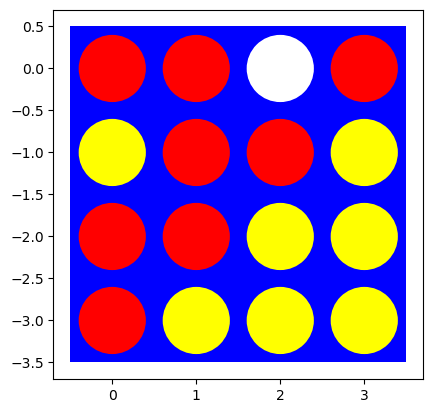

Minimax wins!
Average time per minimax move: 0.004 seconds

Analyzing performance on different board sizes:

Testing board size (4, 4):
Minimax wins!
Average time per minimax move: 0.005 seconds
Average time: 0.005 seconds
Max time: 0.007 seconds
Min time: 0.002 seconds

Testing board size (4, 5):
Minimax wins!
Average time per minimax move: 0.011 seconds
Average time: 0.011 seconds
Max time: 0.014 seconds
Min time: 0.006 seconds

Testing board size (4, 6):
Minimax wins!
Average time per minimax move: 0.020 seconds
Average time: 0.020 seconds
Max time: 0.032 seconds
Min time: 0.000 seconds


In [ ]:
import numpy as np
from typing import Optional, Tuple
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt

class MinimaxPlayer:
    def __init__(self, max_depth: Optional[int] = None):
        self.max_depth = max_depth

    def __call__(self, board: np.ndarray, player: int) -> int:
        valid_moves = [col for col in range(board.shape[1]) if board[0][col] == 0]
        best_value = float('-inf')
        best_move = valid_moves[0]
        alpha = float('-inf')
        beta = float('inf')

        for move in valid_moves:
            new_board = self.make_move(board.copy(), move, player)
            value = self.min_value(new_board, player, alpha, beta, 1)
            if value > best_value:
                best_value = value
                best_move = move
            alpha = max(alpha, best_value)
        return best_move

    def max_value(self, board: np.ndarray, player: int, alpha: float, beta: float, depth: int) -> float:
        if self.is_terminal(board) or (self.max_depth and depth >= self.max_depth):
            return self.evaluate(board, player)

        value = float('-inf')
        valid_moves = [col for col in range(board.shape[1]) if board[0][col] == 0]

        for move in valid_moves:
            new_board = self.make_move(board.copy(), move, player)
            value = max(value, self.min_value(new_board, player, alpha, beta, depth + 1))
            if value >= beta:
                return value
            alpha = max(alpha, value)
        return value

    def min_value(self, board: np.ndarray, player: int, alpha: float, beta: float, depth: int) -> float:
        if self.is_terminal(board) or (self.max_depth and depth >= self.max_depth):
            return self.evaluate(board, player)

        value = float('inf')
        valid_moves = [col for col in range(board.shape[1]) if board[0][col] == 0]

        for move in valid_moves:
            new_board = self.make_move(board.copy(), move, -player)
            value = min(value, self.max_value(new_board, player, alpha, beta, depth + 1))
            if value <= alpha:
                return value
            beta = min(beta, value)
        return value

    def make_move(self, board: np.ndarray, column: int, player: int) -> np.ndarray:
        for row in range(board.shape[0]-1, -1, -1):
            if board[row][column] == 0:
                board[row][column] = player
                return board
        return board

    def check_win(self, board: np.ndarray, player: int) -> bool:
        # Horizontal, Vertical, and Diagonal checks (same as before)
        for row in range(board.shape[0]):
            for col in range(board.shape[1]-3):
                if all(board[row][col+i] == player for i in range(4)):
                    return True

        for row in range(board.shape[0]-3):
            for col in range(board.shape[1]):
                if all(board[row+i][col] == player for i in range(4)):
                    return True

        for row in range(board.shape[0]-3):
            for col in range(board.shape[1]-3):
                if all(board[row+i][col+i] == player for i in range(4)):
                    return True

        for row in range(3, board.shape[0]):
            for col in range(board.shape[1]-3):
                if all(board[row-i][col+i] == player for i in range(4)):
                    return True

        return False

    def is_terminal(self, board: np.ndarray) -> bool:
        return self.check_win(board, 1) or self.check_win(board, -1) or \
               len([col for col in range(board.shape[1]) if board[0][col] == 0]) == 0

    def evaluate(self, board: np.ndarray, player: int) -> float:
        if self.check_win(board, player):
            return 1
        elif self.check_win(board, -player):
            return -1
        return 0

class Connect4Environment:
    def __init__(self, shape: Tuple[int, int] = (6, 7)):
        self.shape = shape
        self.board = np.zeros(shape, dtype=int)

    def visualize(self):
        plt.axes()
        rectangle = plt.Rectangle((-0.5, self.shape[0]*-1+0.5), self.shape[1], self.shape[0], fc='blue')
        circles = []
        for i, row in enumerate(self.board):
            for j, val in enumerate(row):
                color = 'white' if val == 0 else 'red' if val == 1 else 'yellow'
                circles.append(plt.Circle((j, i*-1), 0.4, fc=color))
        plt.gca().add_patch(rectangle)
        for circle in circles:
            plt.gca().add_patch(circle)
        plt.axis('scaled')
        plt.show()

    def reset(self):
        self.board = np.zeros(self.shape, dtype=int)
        return self.board.copy()

    def make_move(self, column: int, player: int) -> bool:
        for row in range(self.shape[0]-1, -1, -1):
            if self.board[row][column] == 0:
                self.board[row][column] = player
                return True
        return False

    def check_win(self, player: int) -> bool:
        # Same win checking logic as MinimaxPlayer
        return MinimaxPlayer().check_win(self.board, player)

    def is_draw(self) -> bool:
        return not any(self.board[0] == 0)

    def is_game_over(self) -> bool:
        return self.check_win(1) or self.check_win(-1) or self.is_draw()

def play_game_minimax_vs_random(board_size=(4, 4), max_depth=5, visualize=True):
    env = Connect4Environment(board_size)
    minimax_player = MinimaxPlayer(max_depth=max_depth)

    def random_player(board, player):
        valid_moves = [col for col in range(board.shape[1]) if board[0][col] == 0]
        return np.random.choice(valid_moves)

    current_player = 1
    moves_times = []

    while not env.is_game_over():
        if visualize:
            clear_output(wait=True)
            env.visualize()

        start_time = time.time()
        if current_player == 1:
            move = minimax_player(env.board.copy(), current_player)
            moves_times.append(time.time() - start_time)
        else:
            move = random_player(env.board.copy(), current_player)

        env.make_move(move, current_player)
        current_player *= -1

    if visualize:
        clear_output(wait=True)
        env.visualize()

    if env.check_win(1):
        print("Minimax wins!")
    elif env.check_win(-1):
        print("Random player wins!")
    else:
        print("Draw!")

    print(f"Average time per minimax move: {np.mean(moves_times):.3f} seconds")
    return moves_times

# Run games with different board sizes
def analyze_performance():
    board_sizes = [(4,4), (4,5), (4,6)]
    results = {}

    for size in board_sizes:
        print(f"\nTesting board size {size}:")
        move_times = play_game_minimax_vs_random(board_size=size, max_depth=5, visualize=False)
        results[size] = {
            'avg_time': np.mean(move_times),
            'max_time': np.max(move_times),
            'min_time': np.min(move_times)
        }
        print(f"Average time: {results[size]['avg_time']:.3f} seconds")
        print(f"Max time: {results[size]['max_time']:.3f} seconds")
        print(f"Min time: {results[size]['min_time']:.3f} seconds")

    return results

if __name__ == "__main__":
    # Play a single game with visualization
    print("Playing game on 4x4 board:")
    play_game_minimax_vs_random(board_size=(4,4), max_depth=5)

    # Analyze performance on different board sizes
    print("\nAnalyzing performance on different board sizes:")
    results = analyze_performance()

## Task 4: Heuristic Alpha-Beta Tree Search

### Heuristic evaluation function [15 points]

Define and implement a heuristic evaluation function. Make sure that the heuristic value stays in the correct range.

### Cutting Off Search [10 points]

Modify your minimax search with alpha-beta pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

Experiment with the same manually created boards as above to check if the agent spots wining opportunities.

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

### Playtime [5 points]

Let two heuristic search agents (different cutoff depth, different heuristic evaluation function) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [ ]:
import numpy as np
from typing import Optional, Tuple
import time

class HeuristicConnect4Player:
    def __init__(self, max_depth: int = 4):
        self.max_depth = max_depth

    def __call__(self, board: np.ndarray, player: int) -> int:
        valid_moves = [col for col in range(board.shape[1]) if board[0][col] == 0]
        best_score = float('-inf')
        best_move = valid_moves[0]
        alpha = float('-inf')
        beta = float('inf')

        for move in valid_moves:
            new_board = self.make_move(board.copy(), move, player)
            score = self.minimax(new_board, self.max_depth-1, False, player, alpha, beta)
            if score > best_score:
                best_score = score
                best_move = move
            alpha = max(alpha, best_score)
        return best_move

    def minimax(self, board: np.ndarray, depth: int, is_maximizing: bool, player: int, alpha: float, beta: float) -> float:
        if depth == 0 or self.is_terminal(board):
            return self.evaluate(board, player)

        valid_moves = [col for col in range(board.shape[1]) if board[0][col] == 0]

        if is_maximizing:
            value = float('-inf')
            for move in valid_moves:
                new_board = self.make_move(board.copy(), move, player)
                value = max(value, self.minimax(new_board, depth-1, False, player, alpha, beta))
                alpha = max(alpha, value)
                if beta <= alpha:
                    break
            return value
        else:
            value = float('inf')
            for move in valid_moves:
                new_board = self.make_move(board.copy(), move, -player)
                value = min(value, self.minimax(new_board, depth-1, True, player, alpha, beta))
                beta = min(beta, value)
                if beta <= alpha:
                    break
            return value

    def evaluate(self, board: np.ndarray, player: int) -> float:
        if self.check_win(board, player):
            return 10000
        if self.check_win(board, -player):
            return -10000

        score = 0
        # Center column control
        center_array = board[:, board.shape[1]//2]
        score += np.sum(center_array == player) * 3

        # Evaluate potential winning patterns
        for r in range(board.shape[0]):
            row_array = board[r, :]
            for c in range(board.shape[1]-3):
                window = row_array[c:c+4]
                score += self.evaluate_window(window, player)

        for c in range(board.shape[1]):
            col_array = board[:, c]
            for r in range(board.shape[0]-3):
                window = col_array[r:r+4]
                score += self.evaluate_window(window, player)

        for r in range(board.shape[0]-3):
            for c in range(board.shape[1]-3):
                window = [board[r+i][c+i] for i in range(4)]
                score += self.evaluate_window(window, player)

        for r in range(board.shape[0]-3):
            for c in range(board.shape[1]-3):
                window = [board[r+3-i][c+i] for i in range(4)]
                score += self.evaluate_window(window, player)

        return score

    def evaluate_window(self, window, player: int) -> float:
        score = 0
        opponent = -player

        player_count = np.sum(window == player)
        empty_count = np.sum(window == 0)
        opponent_count = np.sum(window == opponent)

        if player_count == 4:
            score += 100
        elif player_count == 3 and empty_count == 1:
            score += 5
        elif player_count == 2 and empty_count == 2:
            score += 2

        if opponent_count == 3 and empty_count == 1:
            score -= 4

        return score

    def make_move(self, board: np.ndarray, column: int, player: int) -> np.ndarray:
        for row in range(board.shape[0]-1, -1, -1):
            if board[row][column] == 0:
                board[row][column] = player
                return board
        return board

    def check_win(self, board: np.ndarray, player: int) -> bool:
        # Horizontal
        for r in range(board.shape[0]):
            for c in range(board.shape[1]-3):
                if all(board[r][c+i] == player for i in range(4)):
                    return True

        # Vertical
        for r in range(board.shape[0]-3):
            for c in range(board.shape[1]):
                if all(board[r+i][c] == player for i in range(4)):
                    return True

        # Diagonal (positive slope)
        for r in range(board.shape[0]-3):
            for c in range(board.shape[1]-3):
                if all(board[r+i][c+i] == player for i in range(4)):
                    return True

        # Diagonal (negative slope)
        for r in range(3, board.shape[0]):
            for c in range(board.shape[1]-3):
                if all(board[r-i][c+i] == player for i in range(4)):
                    return True

        return False

    def is_terminal(self, board: np.ndarray) -> bool:
        return self.check_win(board, 1) or self.check_win(board, -1) or \
               len([col for col in range(board.shape[1]) if board[0][col] == 0]) == 0

class Connect4Environment:
    def __init__(self, shape: Tuple[int, int] = (6, 7)):
        self.shape = shape
        self.board = np.zeros(shape, dtype=int)

    def reset(self) -> np.ndarray:
        self.board = np.zeros(self.shape, dtype=int)
        return self.board.copy()

    def step(self, column: int, player: int) -> bool:
        if column < 0 or column >= self.shape[1]:
            return False

        for row in range(self.shape[0]-1, -1, -1):
            if self.board[row][column] == 0:
                self.board[row][column] = player
                return True
        return False

    def check_winner(self) -> Optional[int]:
        player = HeuristicConnect4Player()
        if player.check_win(self.board, 1):
            return 1
        if player.check_win(self.board, -1):
            return -1
        if player.is_terminal(self.board):
            return 0
        return None

def evaluate_performance():
    board_sizes = [(4,4), (4,5), (4,6), (6,7)]
    depths = [2, 3, 4]

    for size in board_sizes:
        print(f"\nBoard size {size}:")
        board = np.zeros(size)

        for depth in depths:
            player = HeuristicConnect4Player(max_depth=depth)
            start = time.time()
            move = player(board, 1)
            end = time.time()
            print(f"Depth {depth}: {end-start:.3f} seconds")

def play_game(depth1: int = 4, depth2: int = 3, board_size: Tuple[int, int] = (4, 4)):
    env = Connect4Environment(board_size)
    player1 = HeuristicConnect4Player(max_depth=depth1)
    player2 = HeuristicConnect4Player(max_depth=depth2)
    current_player = 1

    while env.check_winner() is None:
        player = player1 if current_player == 1 else player2
        move = player(env.board.copy(), current_player)
        env.step(move, current_player)
        print(f"\nPlayer {current_player} move:")
        print(env.board)
        current_player *= -1

    winner = env.check_winner()
    print(f"\nWinner: {'Player 1' if winner == 1 else 'Player 2' if winner == -1 else 'Draw'}")

if __name__ == "__main__":
    evaluate_performance()
    play_game(depth1=4, depth2=3, board_size=(4,4))


Board size (4, 4):
Depth 2: 0.003 seconds
Depth 3: 0.009 seconds
Depth 4: 0.018 seconds

Board size (4, 5):
Depth 2: 0.005 seconds
Depth 3: 0.020 seconds
Depth 4: 0.043 seconds

Board size (4, 6):
Depth 2: 0.008 seconds
Depth 3: 0.047 seconds
Depth 4: 0.110 seconds

Board size (6, 7):
Depth 2: 0.025 seconds
Depth 3: 0.170 seconds
Depth 4: 0.331 seconds

Player 1 move:
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 1 0]]

Player -1 move:
[[ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0 -1  0]
 [ 0  0  1  0]]

Player 1 move:
[[ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0 -1  0]
 [ 1  0  1  0]]

Player -1 move:
[[ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0 -1  0]
 [ 1 -1  1  0]]

Player 1 move:
[[ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  1 -1  0]
 [ 1 -1  1  0]]

Player -1 move:
[[ 0  0  0  0]
 [ 0  0 -1  0]
 [ 0  1 -1  0]
 [ 1 -1  1  0]]

Player 1 move:
[[ 0  0  1  0]
 [ 0  0 -1  0]
 [ 0  1 -1  0]
 [ 1 -1  1  0]]

Player -1 move:
[[ 0  0  1  0]
 [ 0 -1 -1  0]
 [ 0  1 -1  0]
 [ 1 -1  1  0]]

Player 1 move:
[[ 0  1  1  0]
 [ 0 -1 -

## Challenge task [up to +10 bonus point will be awarded separately]

Find another student and let your best agent play against the other student's best player. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search and investigate how this search performs on the test boards that you have used above.

### Best First Move

Use your Monte Carlo Search to determine what the best first move for red is? Describe under what assumptions this is the "best" first move.  

In [ ]:
import numpy as np
import random
import time
from typing import List, Tuple, Optional

class MonteCarloConnect4Player:
    def __init__(self, num_simulations: int = 1000):
        self.num_simulations = num_simulations

    def __call__(self, board: np.ndarray, player: int) -> int:
        valid_moves = [col for col in range(board.shape[1]) if board[0][col] == 0]
        best_move = valid_moves[0]
        best_wins = float('-inf')

        for move in valid_moves:
            wins = 0
            for _ in range(self.num_simulations):
                simulation_board = board.copy()
                simulation_board = self.make_move(simulation_board, move, player)
                if self.check_win(simulation_board, player):
                    wins += 1
                else:
                    winner = self.simulate_random_game(simulation_board, -player)
                    if winner == player:
                        wins += 1
                    elif winner == 0:  # Draw
                        wins += 0.5

            win_rate = wins / self.num_simulations
            if win_rate > best_wins:
                best_wins = win_rate
                best_move = move

        return best_move

    def simulate_random_game(self, board: np.ndarray, player: int) -> int:
        current_board = board.copy()
        current_player = player

        while True:
            if self.check_win(current_board, 1):
                return 1
            if self.check_win(current_board, -1):
                return -1

            valid_moves = [col for col in range(current_board.shape[1])
                          if current_board[0][col] == 0]
            if not valid_moves:  # Draw
                return 0

            move = random.choice(valid_moves)
            current_board = self.make_move(current_board, move, current_player)
            current_player = -current_player

    def make_move(self, board: np.ndarray, column: int, player: int) -> np.ndarray:
        for row in range(board.shape[0]-1, -1, -1):
            if board[row][column] == 0:
                board[row][column] = player
                return board
        return board

    def check_win(self, board: np.ndarray, player: int) -> bool:
        # Horizontal
        for r in range(board.shape[0]):
            for c in range(board.shape[1]-3):
                if all(board[r][c+i] == player for i in range(4)):
                    return True

        # Vertical
        for r in range(board.shape[0]-3):
            for c in range(board.shape[1]):
                if all(board[r+i][c] == player for i in range(4)):
                    return True

        # Diagonal (positive slope)
        for r in range(board.shape[0]-3):
            for c in range(board.shape[1]-3):
                if all(board[r+i][c+i] == player for i in range(4)):
                    return True

        # Diagonal (negative slope)
        for r in range(3, board.shape[0]):
            for c in range(board.shape[1]-3):
                if all(board[r-i][c+i] == player for i in range(4)):
                    return True

        return False

def analyze_first_move():
    board = np.zeros((6, 7))
    player = MonteCarloConnect4Player(num_simulations=5000)

    valid_moves = range(7)
    results = {}

    for move in valid_moves:
        start = time.time()
        wins = 0
        for _ in range(1000):
            test_board = board.copy()
            test_board = player.make_move(test_board, move, 1)
            winner = player.simulate_random_game(test_board, -1)
            if winner == 1:
                wins += 1
            elif winner == 0:
                wins += 0.5
        win_rate = wins / 1000
        results[move] = win_rate
        print(f"Column {move}: {win_rate:.3f} win rate ({time.time() - start:.1f}s)")

    best_move = max(results.items(), key=lambda x: x[1])
    print(f"\nBest first move: Column {best_move[0]} with {best_move[1]:.3f} win rate")
    return results

if __name__ == "__main__":
    results = analyze_first_move()

Column 0: 0.489 win rate (2.6s)
Column 1: 0.575 win rate (2.7s)
Column 2: 0.566 win rate (2.8s)
Column 3: 0.642 win rate (3.9s)
Column 4: 0.559 win rate (3.1s)
Column 5: 0.534 win rate (2.6s)
Column 6: 0.520 win rate (2.6s)

Best first move: Column 3 with 0.642 win rate
